In [3]:
import gensim
import os
from gensim.models.word2vec import Word2Vec
from gensim.models.word2vec import LineSentence
from gensim.models.word2vec import Text8Corpus
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import logging
import zipfile

In [2]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
# Set file names for train and test data
data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data']) + os.sep
training_file = data_dir + 'lee_background.cor'
sentences = LineSentence(training_file)


In [4]:
sentences = []
with open('q.txt','r') as f:
    for line in f:
        sentences.append(line)
model = Word2Vec(sentences,50)

In [6]:
 # train the skip-gram model; default window=5
model['I']

/home/ramit/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 0.14153261, -0.08890424,  0.0634099 ,  0.20787172,  0.04912192,
       -0.19662869, -0.1507383 ,  0.00103208,  0.02198102,  0.07548351,
       -0.07307929, -0.0240673 , -0.15563825,  0.1610484 ,  0.06149315,
       -0.16452195, -0.24646921, -0.09944674, -0.02691814, -0.09570359,
       -0.01456376, -0.03079704,  0.08509263, -0.07097492, -0.10155714,
        0.02064317,  0.04590178, -0.11716639,  0.20516533,  0.26854315,
        0.00333965,  0.26364887,  0.06227428,  0.14066726, -0.05009152,
       -0.07622876,  0.07676305,  0.01910854,  0.11568314, -0.0203854 ,
       -0.07142819, -0.06375388,  0.03952905,  0.03541195,  0.06318472,
        0.14248332, -0.16964535,  0.08867356,  0.06334855, -0.08492323],
      dtype=float32)

In [6]:
model.save('saved_w2v_gensim')

2018-05-29 23:37:36,821 : INFO : saving Word2Vec object under saved_w2v_gensim, separately None
2018-05-29 23:37:36,823 : INFO : not storing attribute vectors_norm
2018-05-29 23:37:36,824 : INFO : not storing attribute cum_table
2018-05-29 23:37:37,460 : INFO : saved saved_w2v_gensim


In [7]:
model = Word2Vec.load('saved_w2v_gensim')

2018-05-29 23:37:37,467 : INFO : loading Word2Vec object from saved_w2v_gensim
2018-05-29 23:37:38,089 : INFO : loading wv recursively from saved_w2v_gensim.wv.* with mmap=None
2018-05-29 23:37:38,090 : INFO : setting ignored attribute vectors_norm to None
2018-05-29 23:37:38,091 : INFO : loading vocabulary recursively from saved_w2v_gensim.vocabulary.* with mmap=None
2018-05-29 23:37:38,091 : INFO : loading trainables recursively from saved_w2v_gensim.trainables.* with mmap=None
2018-05-29 23:37:38,091 : INFO : setting ignored attribute cum_table to None
2018-05-29 23:37:38,092 : INFO : loaded saved_w2v_gensim


In [1]:
with open('testfile.txt','r') as f:
    for i,c in enumerate(f):
        print(i)
            
       
  

0


In [9]:
word = 'human'
compared_word = 'computer'

print('Word {0} is in the corpus: {1}'.format(word, (word in model.wv.vocab)))
print('Word {0} is in the corpus: {1}'.format(compared_word, (compared_word in model.wv.vocab)))

print('Similarity with {0} is: {1}'.format(compared_word, model.similarity(word, compared_word)))

model.most_similar(word)

/home/ramit/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  import sys
/home/ramit/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':
2018-05-29 23:37:38,454 : INFO : precomputing L2-norms of word weight vectors


Word human is in the corpus: True
Word computer is in the corpus: True
Similarity with computer is: 0.322992163515113


[('reproductive', 0.6504706144332886),
 ('humans', 0.6451195478439331),
 ('sentient', 0.6370943784713745),
 ('biological', 0.6337997913360596),
 ('humanity', 0.6268660426139832),
 ('animal', 0.6201885938644409),
 ('supernatural', 0.5879706144332886),
 ('physical', 0.5790598392486572),
 ('subjective', 0.5678771138191223),
 ('cloning', 0.5677643418312073)]

In [10]:
model.most_similar('world', topn = 20)

/home/ramit/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('europe', 0.5657679438591003),
 ('country', 0.49280422925949097),
 ('revolves', 0.486721932888031),
 ('nation', 0.47413331270217896),
 ('america', 0.4680761694908142),
 ('globe', 0.44407814741134644),
 ('worlds', 0.4334122836589813),
 ('revolve', 0.4243417978286743),
 ('india', 0.3910917639732361),
 ('worldwide', 0.3796219825744629),
 ('australia', 0.3778999447822571),
 ('civilization', 0.3770456910133362),
 ('punic', 0.37600046396255493),
 ('revolved', 0.375555157661438),
 ('uefa', 0.3748190402984619),
 ('taranaki', 0.3746306598186493),
 ('universe', 0.37002360820770264),
 ('falklands', 0.3663342595100403),
 ('peloponnesian', 0.36491459608078003),
 ('competition', 0.3610635995864868)]

In [11]:
model['world']

/home/ramit/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.17870903,  0.6038487 ,  0.43614155, -2.6222918 , -1.2668977 ,
        0.12216818, -1.7727689 ,  1.7678324 ,  0.6498382 ,  2.0346375 ,
        2.97059   , -1.7579074 ,  0.19900833, -4.6497536 ,  0.2878417 ,
       -0.19244036,  0.7789324 , -1.065106  ,  2.7811253 ,  0.5543688 ,
        0.33527786,  3.0911844 , -0.09932764,  0.75720996, -1.6608293 ,
        1.5276382 ,  2.389379  ,  1.0194695 , -0.8904052 , -2.564258  ,
       -0.9916951 , -0.5555114 , -3.9660516 , -0.29492798,  2.4119048 ,
        1.8450416 , -3.039132  ,  3.0333595 , -0.9215091 , -0.7212562 ,
       -2.691621  ,  2.4095979 , -2.151497  ,  1.2636399 ,  2.1459866 ,
        1.2164375 , -1.4822855 ,  0.21369782, -2.8390582 , -3.1663082 ,
       -1.8786584 ,  3.4001358 ,  1.1774911 , -0.01312264,  1.977899  ,
       -0.21846429,  2.9094586 ,  1.060622  ,  1.4331744 ,  3.7389376 ,
        2.0026174 , -1.7036506 ,  2.9986918 ,  0.09702151,  1.094208  ,
       -3.0355062 ,  1.0729473 ,  0.70932496, -2.0920382 , -0.48

In [12]:
def display_closestwords_tsnescatterplot(model, word):
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word, topn=100)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    
    plt.figure(figsize=(16,8))
    
    x_coords = Y[1:, 0]
    y_coords = Y[1:, 1]
    
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels[1:], x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    #plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    #plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    
    #plt.figure(figsize=(4, 4))
    
    # Plot the given word separately for different color
    plt.scatter([Y[0, 0]], [Y[0,1]],c='red')
    plt.annotate(word, xy=(Y[0,0], Y[0,1]), xytext=(0, 0), textcoords='offset points')
    
    plt.show()

/home/ramit/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
/home/ramit/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/home/ramit/anaconda2/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


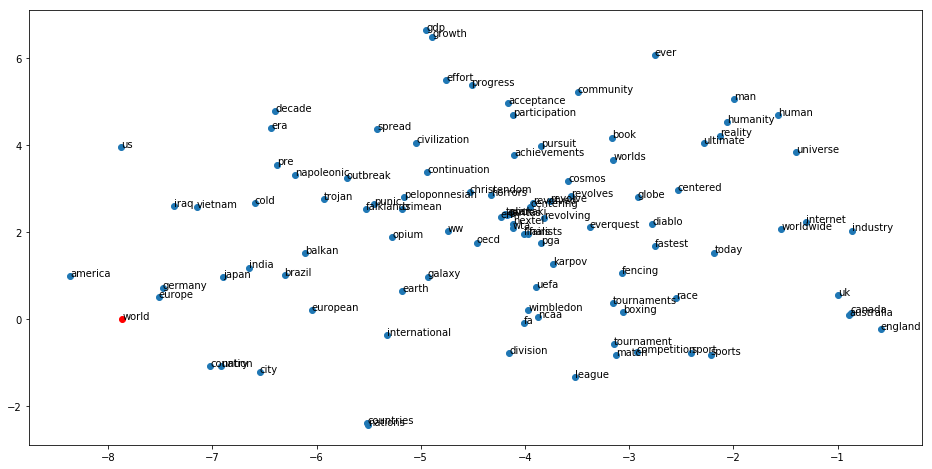

In [13]:
display_closestwords_tsnescatterplot(model, 'world')